# Foundation of Data Science
## Homework 4 

Student Name: Henry Tse

Student Netid: ht688
***

### Part 1: Critique this plan (10 points)
1\. After a few beers your CIO invited his buddy from Green Berry consulting to propose a project using data mining to improve the targeting of the new service that you have been a principal in developing. The service has been quite successful so far, being marketed over the last 6 months via your ingenious, and very inexpensive, word-of-mouth campaign. You've already garnered a pretty large customer base without any targeting, and you've been seeing this success as your best stepping stone to bigger and better things in the firm. 

After some reflection, you've decided that your best course of action is to play a key role in ensuring the success of this data mining project as well. You agree with your CIO's statement in a meeting with Green Berry, that accurate targeting might cost-effectively expand your audience substantially to consumers that word-of-mouth would not reach. You accept that what Green Berry says about the characteristics of your service is accurate.

Based on what we have covered in class, identify the four most serious weaknesses/flaws in this abridged version of Green Berry's proposal, and suggest how to ameliorate them.  Your answer should be 4 bullet points, each comprising 2-4 sentences: 1-2 sentences stating each weakness, and 1-2 sentences suggesting a better alternative.  Maximal credit will be given when the 4 points are as independent as possible.


```
--- -------------------------------------------------------------------------- ---
                            Targeted Audience Expansion             
                      Prepared by Green Berry Consulting, Inc.

Your problem is to expand the audience of your new service.  We (Green Berry) have a 
large database of consumers who can be targeted.  We will build a predictive model 
to estimate which of these consumers are the most likely to adopt the product, and
then target them with the special offer you have designed.

More specifically, we will build a decision tree (DT) model to predict adop-
tion of the service by a consumer, based on the data on your current customers of 
this service.  The model will be based on their demographics and their usage of 
the service. We believe that DT is the best choice of method be-
cause it is a tried-and-true modeling technique, and we can easily 
interpret the model to infer whether the attributes make sense. We will apply the model to our large 
database of consumers, and select out those who have not yet subscribed and whom
the DT model predicts to be likely to subscribe.  To these we will send 
the targeted offer. As this is a fixed-profit-per-customer service, this also 
will in effect rank them by expected profit.
--- -------------------------------------------------------------------------- ---
```

**Write your answer here.**

- Decision Tree models are easy to overfit. The flexibility of decision tree algorithms requires careful tuning of parameters and leaf pruning. In order to ameliorate this flaw, the model should not try to fit all examples and stop before the training set is depleted. Leaf pruning of the resulting tree should be done after all modeling examples are fitted and prevent overgrowing trees.
- Tree splitting is locally greedy, small changes in data can lead to extremely different results. At each level the tree looks for a binary split such that impurity of tree is reduced by maximum amount, this will typically lead to a local optimal rather than a global optimal. A solution to this problem would be dynamic programming. Dynamic programming solves this issue by precomuting and storing simplier/similar subproblems which counters issues with greedy algorithms.
- Decision Tree algorithm is inadaquet in predicting continuous values. It would be difficult to rank expected profit from each customer as it would only be sufficient to group them. One solution to this problem would be to create groups such as "Highly Profitable", "Medium Profitable", and "Low Profitable." Given the result of the dataset, one can set a range for each of these groups and catagorize them. With this information we can target those in the Highly or Medium Profitable groups.
- Optimal Decision Tree is a NP-complete problem. Global optimization of a decision tree is nearly impossible due to it's humongous features. One should build another model such as clustering, linear regression, or logistic regression to verify it's results. 

### Part 2: Working with Time Series (5 points)

Here we will analyze a timeseries of number of Yellow Fever cases from a specific Asian country by year. The data is from 1700 – 2008 (use file cases.csv for this section).

1\. Load the timeseries data set, and prepare the dataset by converting the variables to date-time format (hint: use date tools and the library statsmodels). (1 point)

In [2]:
#write your code here
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

dta = pd.read_csv("cases.csv")
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('1700','2008'))
del dta['YEAR']

2\. Plot the autocorrelation function (ACF) for the cases timeseries (hint: use statsmodels plot_acf for that). (2 points)

To learn more about how to interpret these graphs, you may find this useful: https://medium.com/analytics-vidhya/interpreting-acf-or-auto-correlation-plot-d12e9051cd14

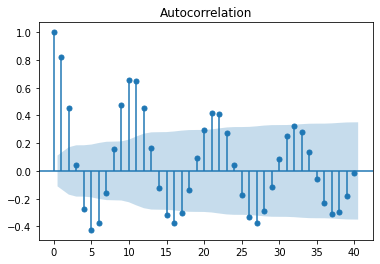

In [9]:
#write your code here
sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40)
plt.show()

3\. An approach to assess the presence of a significant autocorrelation in the data is to use the Durbin-Waton (DW) statistic. The value of the DW statistic is close to 2 if the errors are uncorrelated. What is the DW for our data? Does this suggest that the data has a relatively high or a relatively low autocorrelation? (2 point) 

In [7]:
#write your code here
from statsmodels.stats.stattools import durbin_watson
durbin_watson(dta)

array([0.13952893])

### Part 3: Comparison of Models (10 points)

In this part we will be looking at data generated by particle physicists to test if machine learning can help classify whether certain particle decay experiments identify the presence of a Higgs Boson. One does not need to know anything about particle physics to do well here, but if you are curious, full feature and data descriptions can be found here:

- https://www.kaggle.com/c/higgs-boson/data
- http://higgsml.lal.in2p3.fr/files/2014/04/documentation_v1.8.pdf

The goal of this assignment is to practice how to compare different classification models using the area under the ROC curve (AUC). 


1\. Create a data preparation and cleaning function that does the following:
- Has a single input that is a file name string
- Reads data (the data is comma separated, has a row header and the first column `EventID` is the index) into a pandas `dataframe`
- Cleans the data
  - Convert the feature `Label` to numeric (choose the minority class to be equal to 1)
    - Create a feature `Y` with numeric label
    - Drop the feature `Label`
  - If a feature has missing values (i.e., `-999`): 
    - Create a dummy variable for the missing value
      - Call the variable `orig_var_name` + `_mv` where `orig_var_name` is the name of the actual var with a missing value
      - Give this new variable a 1 if the original variable is missing
    - Replace the missing value with the average of the feature (make sure to compute the mean on records where the value isn't missing). You may find pandas' `.replace()` function useful.
- After the above is done, rescales the data so that each feature has zero mean and unit variance (hint: look up sklearn.preprocessing)
- Returns the cleaned and rescaled dataset

Hint: as a guide, this function can easily be done in less than 15 lines. (2 points)

In [7]:
#write your code here
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.preprocessing import scale

def cleanBosonData(infile_name):
    raw=pd.read_csv(infile_name,header=0,index_col=0,na_values=-999)
    raw=raw.replace({'Label':{Counter(raw['Label']).most_common()[0][0]:0,Counter(raw['Label']).most_common()[1][0]:1}}).rename(columns={'Label':'Y'})
    for col in raw.columns.values[:-1]:
        if raw[col].isnull().any().any():
            raw[(col+'_mv')]=np.where(raw[col].isnull(),1,0)
            raw[col]=raw[col].fillna(raw[col].mean())
        raw[col]=scale(raw[col])
    return raw

2\. Clean the two data files included in this assignment (`boson_training_cut_2000.csv` and `boson_testing_cut.csv`) and use them as training and testing data sets.

(1 Point)

In [9]:
#write your code here
data_train = cleanBosonData("boson_training_cut_2000.csv")
data_test = cleanBosonData("boson_testing_cut.csv")

3\. On the training set, build the following models:

- A KNN classifier using sklearn's `neighbors.KNeighborsClassifier`. For this model, use the standard parameters. 
- An sklearn classifier of your choice (e.g., `tree.DecisionTreeClassifierSVM`, `svm.svc()`, `linear_model.LogisticRegression()`, `naive_bayes.GaussianNB` etc.).

For each model above, plot the ROC curve of both models on the same plot. Make sure to use the test set for computing and plotting. In the legend, also print out the Area Under the ROC (AUC) for reference.

(Hint: to get the prediction thresholds that are necessary for the AUC, use function predict_proba() for KNN and for the classifier you choose if it has it. If you work with SVM, use function decision_function().)

(4 Points)

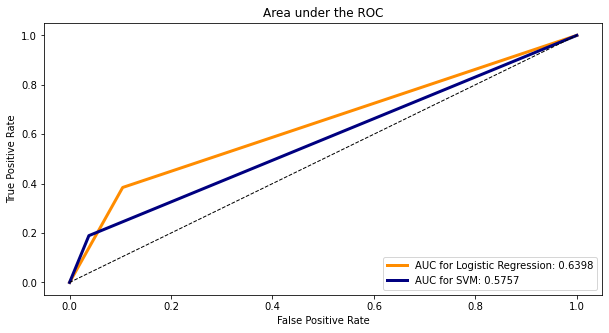

In [10]:
#write your code here
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn import linear_model
from sklearn.svm import SVC

%matplotlib inline
#Creating a model using Logistic regression
logreg = linear_model.LogisticRegression(C = 1e30).fit(data_train.drop('Y', 1), data_train['Y'])
#Creating a model using Support Vector Machines
svm=SVC(kernel="linear").fit(data_train.drop('Y',1),data_train['Y'])

#We predict values using the above developed models
pred_logreg=logreg.predict(data_test.drop('Y',1))
pred_svm=svm.predict(data_test.drop('Y',1))

#Calculating the FPR and the TPR for our predicted values
roc_log=roc_curve(y_true=data_test['Y'],y_score=pred_logreg)
roc_svm=roc_curve(y_true=data_test['Y'],y_score=pred_svm)

#Plotting values on a graph
plt.figure(figsize=(10,5))
plt.plot(roc_log[0],roc_log[1],color='darkorange',lw=3,label='AUC for Logistic Regression: %.4f' %(roc_auc_score(y_true=data_test['Y'],y_score=pred_logreg)))
plt.plot(roc_svm[0],roc_svm[1],color='navy',lw=3,label='AUC for SVM: %.4f' %(roc_auc_score(y_true=data_test['Y'],y_score=pred_svm)))
plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--') #We plot a base line to indicate 0.5 indicating random chance
plt.title('Area under the ROC')
plt.legend(loc='lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

4\. Which of the two models is generally better at ranking the test set? Are there any classification thresholds where the model identified above as "better" would underperform the other in any classification metric (such as recall)? (3 points)

**Write your analysis here.**

In [11]:
from sklearn.metrics import confusion_matrix
from IPython.display import display, HTML

#Preparing confusion matrix to check different performance measures
conf_logreg=pd.DataFrame(confusion_matrix(y_true=data_test['Y'],y_pred=pred_logreg))
conf_svm=pd.DataFrame(confusion_matrix(y_true=data_test['Y'],y_pred=pred_svm))

display('Logistic')
display(conf_logreg)
display('SVM')
display(conf_svm)

'Logistic'

,0,1
0,29399,3438
1,10566,6597


'SVM'

,0,1
0,31586,1251
1,13912,3251


The Logistic model performs better than the SVM model on an average. We judge them by using the AUC metric which is base rate invariant. There are specific thresholds for which one model outperforms the other and the final selection must be made on the basis of the utility of the model.

In Logistic:

We observe that the TPR (predicted 0 and actual 0) is higher than SvM. Logistic correctly classifies actual true values for 6597 cases as compared to SVM's 3251 values.
The False Negative Error rate is also less. Logistic has 10566 while SVM has 13912 false negatives.
In SVM:

It is better at classifying True Positives than Logistic. It correctly identifies positives for 31586 cases as compared to logistic's 29399 cases.
The False Positive rate (1251) is also lower than logistic (3438)